# Exercise 5 - Python: Regularized Linear Regression and Bias vs. Variance

## *Part I*: Regularized Linear Regression

Predicting the amount of water flowing out of a dam using the change of water level in a reservoir

---

Beginning with package imports, data loading, and initial visualization

In [1]:
import numpy as np
import pandas as pd
import altair
import scipy.io as sio  # Used to load the Octave/MATLAB *.mat files
from scipy import optimize

In [2]:
# Reading in the .mat file
data = sio.loadmat('ex5/ex5data1.mat')

# Unpacking values from the .mat file
# Training set for fitting the models
X = data['X']
y = data['y']

# Validation set for determining the regularization parameter
Xval = data['Xval']
yval = data['yval']

# Test set for evaluating performance
Xtest = data['Xtest']
ytest = data['ytest']

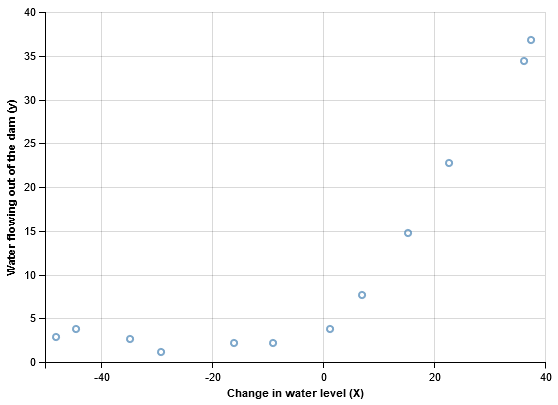

In [3]:
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
altair.Chart(df).mark_point().encode(
    x=altair.X('X:Q', axis=altair.Axis(title='Change in water level (X)')),
    y=altair.Y('y:Q', axis=altair.Axis(title='Water flowing out of the dam (y)')))

### Regularized cost function

$J(\theta) = \frac{1}{2m} \big(\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 \big) + \frac{\lambda}{2m} \big( \sum_{j=1}^n \theta_j^2 \big)$

In [4]:
def cost_function(theta, X, y, C=0.0):
    """
    Calculates the cost for regularized linear regression
    """
    m = y.size
    
    # Adding the intercept term if it doesn't exist
    if X.shape[1] == 1:
        X = np.insert(X, 0, 1, axis=1)
    
    h = X.dot(theta.reshape(-1, 1))  # Generating predictions
    error = np.sum((h - y)**2)  # Calculating squared error
    regParam = (C/(2*m)) * np.sum(np.power(theta[1:], 2))
    
    J = (1/(2*m)) * error + regParam  # Calculating total cost
    
    return J

# Initial values to test our functions and use for theta optimization
initialTheta = np.ones(2)

cost_function(initialTheta, X, y, 1.0)

303.99319222026429

### Regularized gradient

$\frac{\partial J(\theta)}{\partial \theta_j} = \begin{cases} 
\hspace{0.25cm} \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} & \text{for}\ j = 0 \\
\Big(\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\Big) + \frac{\lambda}{m}\theta_j & \text{for}\ j \geq 1
\end{cases}$

In [5]:
def gradient(theta, X, y, C=0.0):
    """
    Calculates the gradient for regularized linear regression
    """
    m = y.size
    
    # Adding the intercept term if it doesn't exist
    if X.shape[1] == 1:
        X = np.insert(X, 0, 1, axis=1)
        
    h = X.dot(theta.reshape(-1, 1))

    # Calculating the regularization parameter for all thetas but the intercept
    regParam = (C/m)*theta[1:]
    
    gradient = (1/m)*(X.T.dot(h-y))
    gradient[1:] = gradient[1:] + regParam  # Applying the reg parameter
    return gradient


gradient(initialTheta, X, y, 1.0)

array([[ -15.30301567],
       [ 598.25074417]])

### Fitting linear regression

In [6]:
# Find values of theta that minimize the cost function
optimalTheta = optimize.fmin(func=cost_function,  # Function to minimize
                             x0=initialTheta,  # Initial guess
                             args=(X, y, 0),  # Additional Arguments
                             maxiter=4000)

optimalTheta

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 58
         Function evaluations: 113


array([ 13.08791065,   0.36778096])

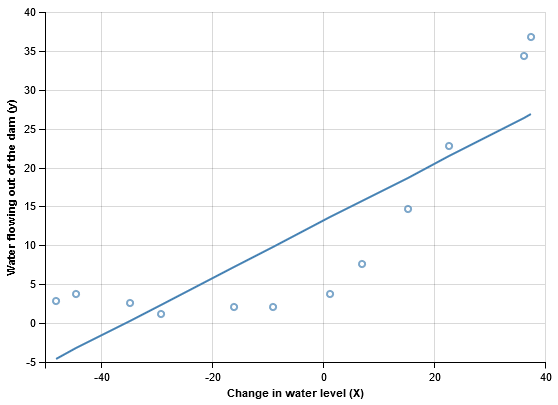

In [7]:
# Generating predictions
df['Prediction'] = optimalTheta[0] + df['X'] * optimalTheta[1]

# Creating the initial object for layering charts
chart = altair.LayeredChart(df)

# Plotting original data
chart += altair.Chart(df).mark_point().encode(
            x=altair.X('X:Q', axis=altair.Axis(title='Change in water level (X)')),
            y=altair.Y('y:Q', axis=altair.Axis(title='Water flowing out of the dam (y)')))

# Adding the fitting line
chart += altair.Chart(df).mark_line().encode(
            x='X:Q',
            y='Prediction:Q')

# Rendering the output
chart.display()

---

##  *Part II:* Bias-Variance

### Learning curves

---

##  *Part III:* Polynomial Regression

### Learning Polynomial Regression

### (Optional) Adjusting the regularization parameter

### Selecting $\lambda$ using a cross validation set

### (Optional)  Computing test set error

### (Optional) Plotting learning curves with randomly selected examples